# Exploratory data analysis of wine data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/Users/bastian/vs_code/wine_analysis/notebooks


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched wine data

In [2]:
import mysql.connector
import pandas as pd

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="rootroot",
    database="wines"
)

# Step 2: Query data from the database
query = """
SELECT 
    ps.web_scraper_order AS wine_id,
    p.name,
    p.price,
    c.country_name AS country,
    p.quantity_in_cl AS quantity,
    p.value,
    p.bio,
    p.non_alcoholic,
    p.premium,
    p.wine_category,
    p.price_category,
    p.price_per_10cl,
    p.quantity_in_cl,
    c.country_code,
    co.consumption_in_l
FROM Products p
JOIN Countries c ON p.country_id = c.country_id
JOIN Consumption co ON c.country_id = co.country_id
JOIN ProductSources ps ON p.product_id = ps.product_id;
"""
df_orig = pd.read_sql(query, connection)

# Step 3: Close the database connection
connection.close()

# Step 4: Clean the data
# Remove duplicates
df_orig = df_orig.drop_duplicates()

# Remove missing values
df_orig = df_orig.dropna()

# Display the first 5 rows
print(df_orig.head(5))


        wine_id                                               name  price  \
0  1734709733-1  NATURAPLAN BIO-PROSECCO DOC RAPHAEL DAL BO, EX...  11.95   
1  1734709733-3    ZÜRICH AOC STAATSSCHREIBER CUVÉE BLANC PRESTIGE  12.70   
2  1734709733-4  PROSECCO SUPERIORE DI VALDOBBIADENE CONEGLIANO...  10.95   
3  1734709733-5         AIGLE LES MURAILLES CHABLAIS AOC H. BADOUX  22.50   
4  1734709733-6                 CHAMPAGNE AOC CHARLES BERTIN, BRUT  19.50   

      country  quantity      value  bio  non_alcoholic  premium  \
0     Italien        75  1.59/10cl    1              0        0   
1     Schweiz        75  1.69/10cl    0              0        1   
2     Italien        75  1.46/10cl    0              0        1   
3     Schweiz        70  3.21/10cl    0              0        0   
4  Frankreich        75  2.60/10cl    0              0        0   

   wine_category price_category  price_per_10cl  quantity_in_cl country_code  \
0     SCHAUMWEIN      Mid-Range            1.59       

The table shows various wine categories (e.g., sparkling wine, white wine) from different countries (Italy, Switzerland, France) und most wines fall into the mid-range price category, indicating affordability.


### Quantiles original values

In [3]:
df = df_orig

df_orig[['price', 'price_per_10cl', 'consumption_in_l']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,price_per_10cl,consumption_in_l
0.05,6.95,0.73,3.52
0.10,6.95,0.93,3.52
0.25,9.30,0.99,4.35
0.50,11.95,1.46,4.83
0.75,18.95,2.14,6.04
0.90,38.50,3.21,6.44
0.95,41.70,3.40,6.44


Most wines are mid-priced with a median price of 11.95. The price per 10cl is consistent at 1.46, and typical consumption is around 4.83 liters, showing steady demand.

The data reflects a focus on affordability

### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(540, 15)


The dataset contains 540 rows and 15 columns, representing a substantial number of wine entries with various attributes.

### Data types

In [5]:
df.dtypes

wine_id              object
name                 object
price               float64
country              object
quantity              int64
value                object
bio                   int64
non_alcoholic         int64
premium               int64
wine_category        object
price_category       object
price_per_10cl      float64
quantity_in_cl        int64
country_code         object
consumption_in_l    float64
dtype: object

The dataset combines categorical and numerical variables, allowing for diverse analysis. Key numerical variables like price and consumption_in_l enable quantitative insights.

### Summary statistics of numeric variables

In [6]:
df.describe()

,price,quantity,bio,non_alcoholic,premium,price_per_10cl,quantity_in_cl,consumption_in_l
count,540.000000,540.000000,540.000000,540.0,540.000000,540.000000,540.000000,540.000000
mean,15.585185,71.185185,0.074074,0.0,0.148148,1.731111,71.185185,4.944074
std,10.159241,20.389595,0.262134,0.0,0.355576,0.961775,20.389595,0.962882
min,4.500000,6.000000,0.000000,0.0,0.000000,0.600000,6.000000,3.020000
25%,9.300000,75.000000,0.000000,0.0,0.000000,0.990000,75.000000,4.350000
50%,11.950000,75.000000,0.000000,0.0,0.000000,1.460000,75.000000,4.830000
75%,18.950000,75.000000,0.000000,0.0,0.000000,2.140000,75.000000,6.040000
max,42.600000,120.000000,1.000000,0.0,1.000000,5.130000,120.000000,6.440000


Most wines are in the mid-price range, with an average price of 15.59. Bio and premium wines are rare, making up 7.4% and 14.8%, respectively. Consumption patterns indicate steady demand.


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Price per 10cl
print('Price per 10cl:',
      'Count:', round(df.price_per_10cl.count(), 1),
      'Min:', round(df.price_per_10cl.min(), 1),
      'Max:', round(df.price_per_10cl.max(), 1),
      'Mean:', round(df.price_per_10cl.mean(), 1),
      'Median:', round(df.price_per_10cl.median(), 1),
      'Std:', round(df.price_per_10cl.std(), 1))

# Quantity
print('Quantity:',
      'Count:', round(df.quantity_in_cl.count(), 1),
      'Min:', round(df.quantity_in_cl.min(), 1),
      'Max:', round(df.quantity_in_cl.max(), 1),
      'Mean:', round(df.quantity_in_cl.mean(), 1),
      'Median:', round(df.quantity_in_cl.median(), 1),
      'Std:', round(df.quantity_in_cl.std(), 1))
      

# Consumption
print('Consumption:',
      'Count:', round(df.consumption_in_l.count(), 1),
      'Min:', round(df.consumption_in_l.min(), 1),
      'Max:', round(df.consumption_in_l.max(), 1),
      'Mean:', round(df.consumption_in_l.mean(), 1),
      'Median:', round(df.consumption_in_l.median(), 1),
      'Std:', round(df.consumption_in_l.std(), 1))

Price: Count: 540 Min: 4.5 Max: 42.6 Mean: 15.6 Median: 12.0 Std: 10.2
Price per 10cl: Count: 540 Min: 0.6 Max: 5.1 Mean: 1.7 Median: 1.5 Std: 1.0
Quantity: Count: 540 Min: 6 Max: 120 Mean: 71.2 Median: 75.0 Std: 20.4
Consumption: Count: 540 Min: 3.0 Max: 6.4 Mean: 4.9 Median: 4.8 Std: 1.0


### Skewness

In [8]:
df[[ 'price_per_10cl', 'quantity_in_cl', 
    'consumption_in_l']].skew()

price_per_10cl      1.808921
quantity_in_cl     -1.917482
consumption_in_l    0.292875
dtype: float64

### Kurtosis

In [9]:
df[['price_per_10cl','quantity_in_cl', 'consumption_in_l']].kurtosis()

price_per_10cl      3.639050
quantity_in_cl      6.056028
consumption_in_l   -0.646874
dtype: float64

### Extreme values

In [10]:
# Low cost wines
df[df['price'] <= 10].head(5)


,wine_id,name,price,country,quantity,value,bio,non_alcoholic,premium,wine_category,price_category,price_per_10cl,quantity_in_cl,country_code,consumption_in_l
5,1734709733-7,"PROSECCO DOC VIGNE DEI DOGI, EXTRA DRY",6.95,Italien,75,0.93/10cl,0,0,0,SCHAUMWEIN,Budget,0.93,75,ITA,4.83
6,1734709733-8,ZÜRICH AOC FEDERWEISSER STAUFFACHER,9.95,Schweiz,75,1.33/10cl,0,0,0,WEISSWEIN,Budget,1.33,75,CHE,4.35
7,1734709733-9,BLU SECCO DOSE VINO FRIZZANTE 6X20CL,8.70,Italien,120,0.73/10cl,0,0,0,SCHAUMWEIN,Budget,0.73,120,ITA,4.83
12,1734709733-14,ALSACE AOP GEWÜRZTRAMINER BARON DE HOEN BEBLEN...,7.35,Frankreich,75,0.98/10cl,0,0,0,GLÜHWEIN,Budget,0.98,75,FRA,6.44
13,1734709733-15,VALAIS AOC DÔLE BLANCHE LES BERNADETTES,9.30,Schweiz,75,1.24/10cl,0,0,0,WEISSWEIN,Budget,1.24,75,CHE,4.35


Low-cost wines (≤ 10) are mostly budget options like sparkling and white wines, with consistent consumption around 4.35–6.44 liters. 

In [11]:
# High cost wines
df[df['price'] >= 30].head(5)

,wine_id,name,price,country,quantity,value,bio,non_alcoholic,premium,wine_category,price_category,price_per_10cl,quantity_in_cl,country_code,consumption_in_l
10,1734709733-12,LA CÔTE AOC GRAND CRU PERROY CUVÉE 48 CAVE DE ...,41.7,Schweiz,6,0.99/10cl,0,0,1,UNCATEGORIZED,Premium,0.99,6,CHE,4.35
21,1734709733-24,"CHAMPAGNE AOC IMPÉRIAL MOËT & CHANDON, BRUT",38.5,Frankreich,75,5.13/10cl,0,0,0,SCHAUMWEIN,Premium,5.13,75,FRA,6.44
23,1734709733-26,VALAIS AOC ROSÉ OEIL DE PERDRIX LE ROSEL 6X 75CL,42.6,Schweiz,6,0.95/10cl,0,0,0,ROSÉWEIN,Premium,0.95,6,CHE,4.35
37,1734709737-41,LA CÔTE AOC GRAND CRU PERROY CUVÉE 48 CAVE DE ...,41.7,Schweiz,6,0.99/10cl,0,0,1,UNCATEGORIZED,Premium,0.99,6,CHE,4.35
48,1734709737-53,"CHAMPAGNE AOC IMPÉRIAL MOËT & CHANDON, BRUT",38.5,Frankreich,75,5.13/10cl,0,0,0,SCHAUMWEIN,Premium,5.13,75,FRA,6.44


High-cost wines (≥ 30) are premium, such as champagne and rosé, catering to niche markets with smaller quantities but luxurious appeal.

### Get a list of categories of categorical variable

In [12]:
np.array(pd.Categorical(df['wine_category']).categories)

array(['GLÜHWEIN', 'ROSÉWEIN', 'ROTWEIN', 'SCHAUMWEIN', 'UNCATEGORIZED',
       'WEISSWEIN'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [13]:
pd.crosstab(df['bio'], df['wine_category'], margins=True)

wine_category,GLÜHWEIN,ROSÉWEIN,ROTWEIN,SCHAUMWEIN,UNCATEGORIZED,WEISSWEIN,All
bio,,,,,,,
0,40,20,40,140,160,100,500
1,0,0,0,40,0,0,40
All,40,20,40,180,160,100,540


Only sparkling wines (SCHAUMWEIN) are marked as bio, with 40 bio wines out of 540 total wines, showing limited diversity in bio options.

In [14]:
pd.crosstab(df['premium'], df['country'], margins=True)

country,Deutschland,Frankreich,Italien,Portugal,Schweiz,Spanien,All
premium,,,,,,,
0,20,120,160,20,100,40,460
1,0,0,40,0,40,0,80
All,20,120,200,20,140,40,540


Premium wines (80 total) are primarily from Italy and Switzerland, reflecting their reputation for high-end wine production. Other countries focus more on non-premium wines.

### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means
pd.pivot_table(df[['price_per_10cl', 'quantity_in_cl', 
                   'consumption_in_l', 'country', 'price']], 
               index=['country'], 
               values=['price', 'consumption_in_l'],
               aggfunc=(np.mean, 'count')).round(2)

consumption_in_l       price       
                       count  mean count   mean
country                                        
Deutschland               20  3.02    20   4.50
Frankreich               120  6.44   120  17.37
Italien                  200  4.83   200  11.47
Portugal                  20  6.04    20  11.25
Schweiz                  140  4.35   140  21.96
Spanien                   40  3.52    40  16.23

France and Switzerland have the highest average wine prices (17.37 and 21.96), indicating a focus on premium wines. France also has the highest average consumption (6.44 liters), reflecting strong demand for its wines.


### Correlation matrix

In [16]:
corr = df[['price', 'price_per_10cl', 'quantity_in_cl', 'consumption_in_l']].cov().corr()

corr

,price,price_per_10cl,quantity_in_cl,consumption_in_l
price,1.000000,0.476194,-0.984387,-0.910494
price_per_10cl,0.476194,1.000000,-0.314309,-0.142756
quantity_in_cl,-0.984387,-0.314309,1.000000,0.957213
consumption_in_l,-0.910494,-0.142756,0.957213,1.000000


### Covariance matrix

In [17]:
cov = df[['price', 'price_per_10cl', 
          'quantity_in_cl', 'consumption_in_l']].cov()

cov

,price,price_per_10cl,quantity_in_cl,consumption_in_l
price,103.210170,4.747568,-148.689274,0.331786
price_per_10cl,4.747568,0.925012,1.875490,0.242812
quantity_in_cl,-148.689274,1.875490,415.735587,3.071971
consumption_in_l,0.331786,0.242812,3.071971,0.927141


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

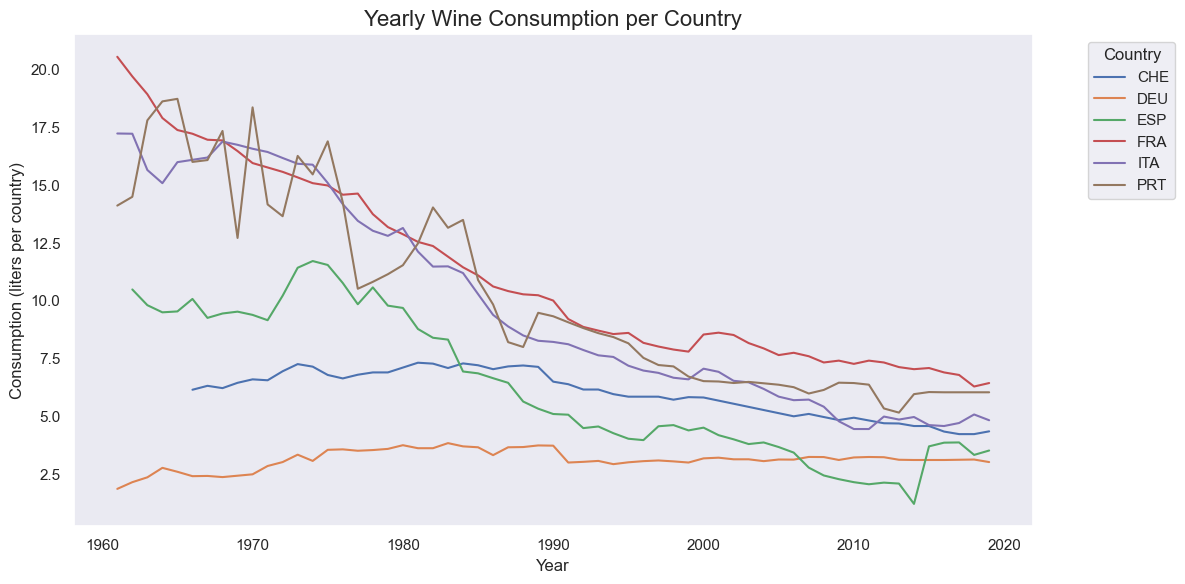

In [18]:
# Load the wine consumption data
consumption_data_path = '../data/raw/wine_consumption_country.csv'
consumption_data = pd.read_csv(consumption_data_path, sep=',', encoding='utf-8')

# Get the country codes from your wine data (df)
country_codes = df['country_code'].unique()

# Filter the consumption data for the countries in your wine data
filtered_consumption = consumption_data[consumption_data['Code'].isin(country_codes)]

# Group the data by year and country, summing up consumption (if necessary)
yearly_consumption = filtered_consumption.groupby(['Year', 'Code'])['Consumption'].sum().reset_index()

# Pivot the data for easier plotting (countries as columns, years as rows)
pivot_data = yearly_consumption.pivot(index='Year', columns='Code', values='Consumption')

# Plot the line chart
plt.figure(figsize=(12, 6))
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], label=country)

# Add labels, title, and legend
plt.title('Yearly Wine Consumption per Country', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Consumption (liters per country)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


The line chart shows a consistent decline in wine consumption across most countries over the years. France and Portugal have historically had the highest consumption levels, but even these countries show a noticeable downward trend, possibly due to changing cultural habits or economic factors. Switzerland and Germany maintain lower but relatively stable consumption levels.

### Boxplot (seaborn)

<Axes: xlabel='price'>

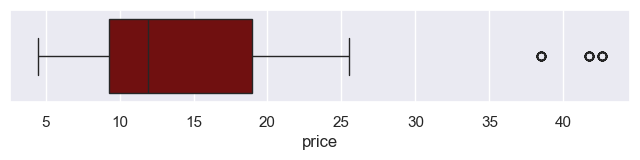

In [19]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price'], color="maroon")

The boxplot shows that most wine prices fall between 10 and 20, with some outliers above 40, indicating a few high-priced premium wines.

### Histogram  (matplotlib)

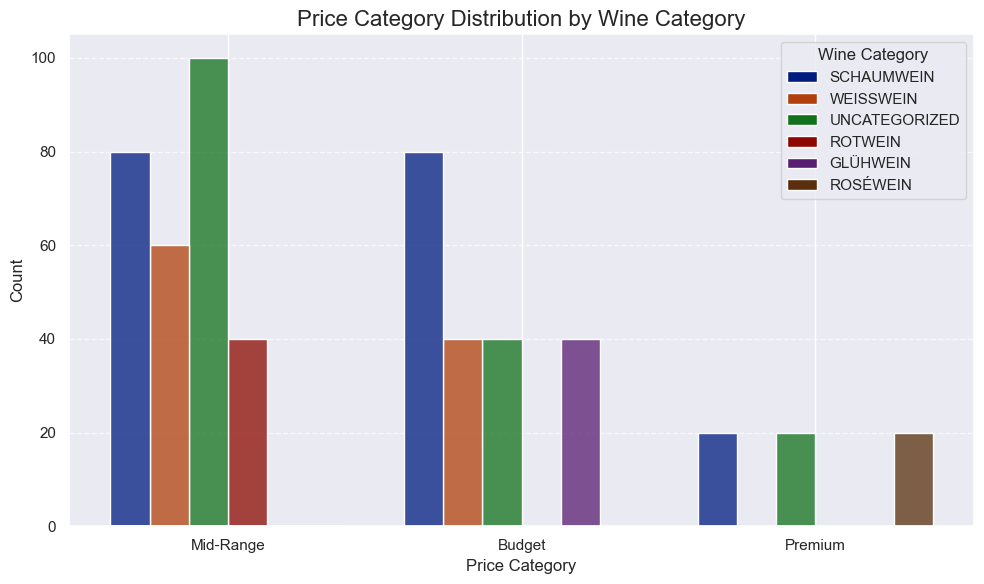

In [20]:
# Define the custom order for price categories
price_category_order = ['Budget', 'Mid-Range', 'Premium']

# Define the color palette
palette = sns.color_palette('dark', len(df['wine_category'].unique()))

# Map each wine category to a color
category_colors = dict(zip(df['wine_category'].unique(), palette))

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df, 
    x='price_category', 
    hue='wine_category', 
    multiple='dodge', 
    shrink=0.8, 
    palette='dark'
)

plt.title('Price Category Distribution by Wine Category', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add a custom legend showing the category colors
for category, color in category_colors.items():
    plt.bar(0, 0, color=color, label=category)
plt.legend(title='Wine Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The histogram highlights that the majority of wines are mid-range, with sparkling (SCHAUMWEIN) and white wines (WEISSWEIN) dominating this category.

### Density plot  (seaborn)

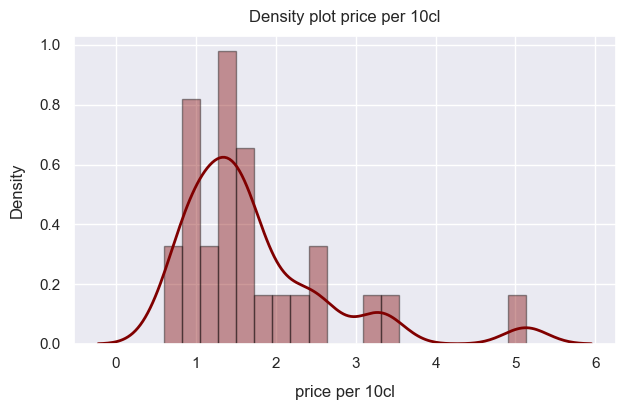

In [21]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_10cl'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'maroon',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per 10cl', fontsize=12, pad=10)
plt.xlabel('price per 10cl', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

The density plot shows that most wines have a price per 10cl concentrated between 1.0 and 2.0, with a peak around 1.0. The prices above 2.0, indicating fewer higher-priced wines.

### Quantile-Quantile (QQ-) plot

     consumption_in_l       var
312              3.02 -1.998246
474              3.02 -1.998246
204              3.02 -1.998246
339              3.02 -1.998246
177              3.02 -1.998246
..                ...       ...
120              6.44  1.553593
436              6.44  1.553593
234              6.44  1.553593
129              6.44  1.553593
292              6.44  1.553593

[540 rows x 2 columns]


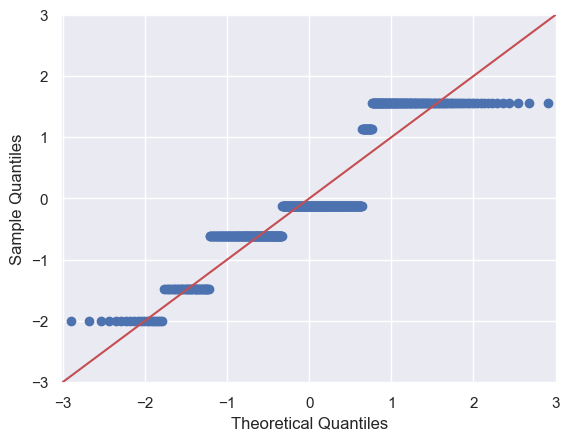

In [22]:
# Variable (standardized)
x = 'consumption_in_l'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['consumption_in_l', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

The Quantile-Quantile plot shows that the distribution of consumption_in_l is mostly normal, with some deviations at the extremes. Data points align well with the 45-degree line in the middle range, indicating a normal distribution in central values.

### Barchart  (matplotlib)

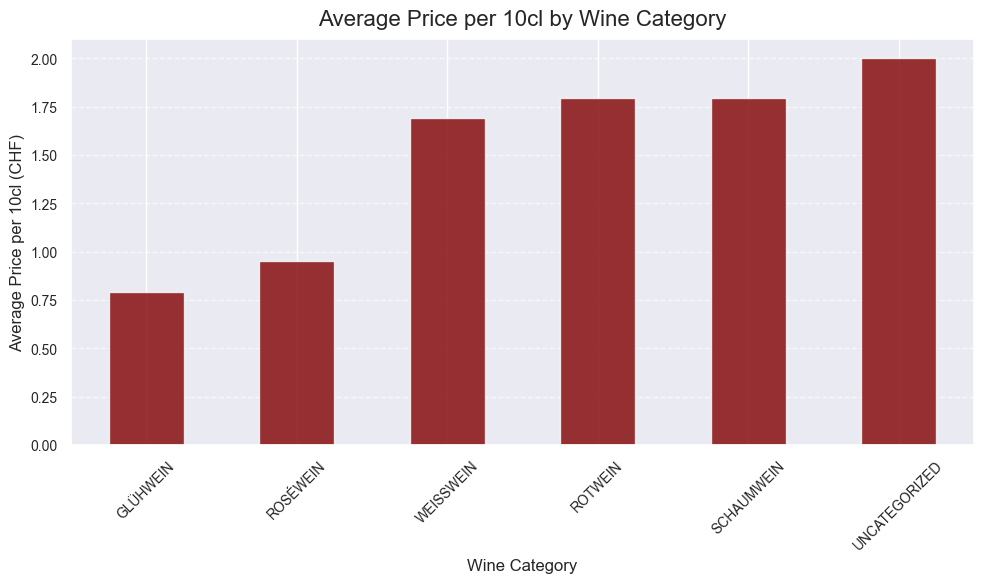

In [23]:
# Group by wine_category and calculate the average price_per_10cl
avg_price_per_category = df.groupby('wine_category')['price_per_10cl'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar', color='maroon', alpha=0.8)

# Add labels and title
plt.title('Average Price per 10cl by Wine Category', fontsize=16, pad=10)
plt.xlabel('Wine Category', fontsize=12)
plt.ylabel('Average Price per 10cl (CHF)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Glühwein and Roséwein have the lowest average prices, indicating they are budget-friendly options.
Weisswein, Rotwein, and Schaumwein are priced similarly, reflecting their mid-range positioning.
Uncategorized wines have the highest average price, possibly indicating niche or premium selections.

## Importing additional data wines_with_abv.csv

In [24]:
# Read the data to a pandas data frame
df_abv = pd.read_csv('../data/enriched/wines_with_abv.csv', sep=',', encoding='utf-8')

# Show first records of data frame
df_abv.head()

,web-scraper-order,web-scraper-start-url,name,price,country_raw,quantity,value,country,name_raw_len,bio,non_alcoholic,premium,wine_category,price_category,quantity_in_cl,price_per_10cl,country_code,consumption_in_l,ABV
0,1734709733-4,https://www.coop.ch/de/weine/alle-weine/c/m_25...,prosecco superiore di valdobbiadene conegliano...,10.95,Italien,75cl,1.46/10cl,Italien,79,0,0,1,SCHAUMWEIN,Mid-Range,75,1.46,ITA,4.83,11.0
1,1734709733-6,https://www.coop.ch/de/weine/alle-weine/c/m_25...,"champagne aoc charles bertin, brut",19.50,Frankreich,75cl,2.60/10cl,Frankreich,34,0,0,0,SCHAUMWEIN,Mid-Range,75,2.60,FRA,6.44,12.0
2,1734709733-7,https://www.coop.ch/de/weine/alle-weine/c/m_25...,"prosecco doc vigne dei dogi, extra dry",6.95,Italien,75cl,0.93/10cl,Italien,38,0,0,0,SCHAUMWEIN,Budget,75,0.93,ITA,4.83,11.0
3,1734709733-9,https://www.coop.ch/de/weine/alle-weine/c/m_25...,blu secco dose vino frizzante 6x20cl,8.70,Italien,120cl,0.73/10cl,Italien,36,0,0,0,SCHAUMWEIN,Budget,120,0.73,ITA,4.83,8.0
4,1734709733-10,https://www.coop.ch/de/weine/alle-weine/c/m_25...,toscana igt rosso villa antinori,12.95,"Italien, 2022",75cl,1.73/10cl,Italien,32,0,0,0,ROTWEIN,Mid-Range,75,1.73,ITA,4.83,5.0


### Piechart (matplotlib)

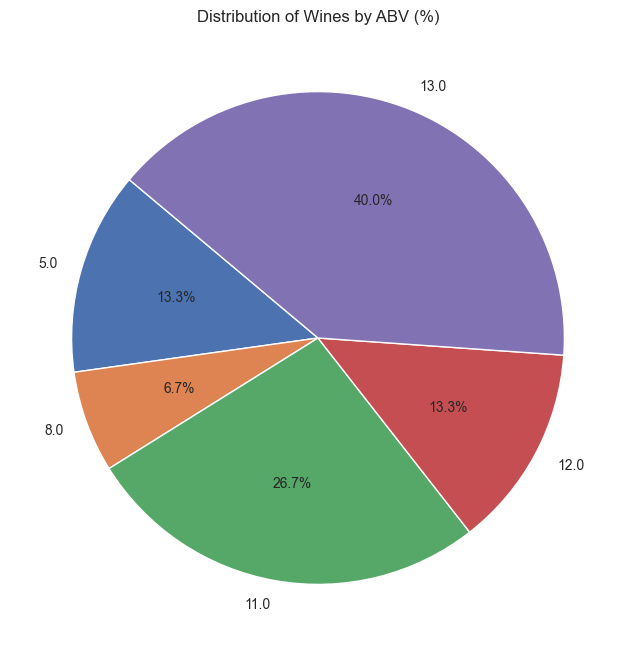

In [25]:
# Group by ABV and count the number of wines
abv_counts = df_abv['ABV'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    abv_counts, 
    labels=abv_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    textprops={'fontsize': 10}
)
plt.title('Distribution of Wines by ABV (%)')
plt.show()




The pie chart highlights the distribution of wines by their alcohol by volume (ABV) percentage. The majority of wines have an ABV of 13% (40%), followed by 11% (26.7%), indicating consumer preference for moderately strong wines.

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

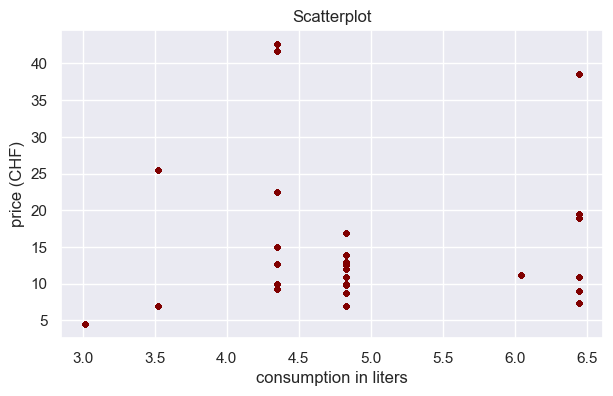

In [26]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(7, 4))

# Create the scatter plot
plt.scatter(df['consumption_in_l'], 
            df['price'], 
            color="maroon", 
            alpha=1.0, 
            s=10)

# Set title and axis labels
plt.title('Scatterplot', fontsize=12)
plt.xlabel('consumption in liters')
plt.ylabel('price (CHF)')


# Display the plot
plt.show()



The scatterplot reveals the relationship between wine price and consumption in liters. It shows that higher prices are associated with lower consumption, while moderate prices (around CHF 10-15) correspond to consistent demand. There are some outliers for both high prices (above CHF 40) and high consumption (above 6 liters).

### Scatterplot (matplotlib) with regression line

(540, 16)
0.35785911831923434
13.815903196132066


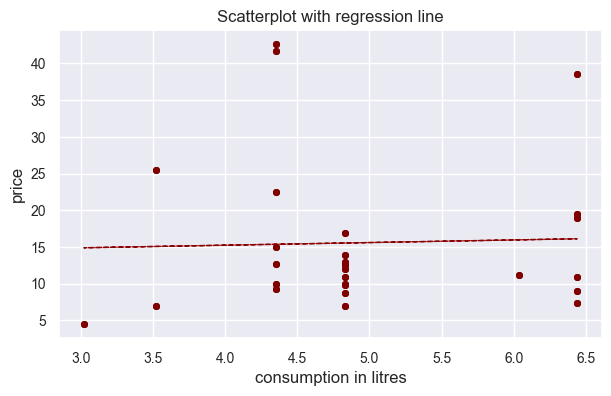

In [27]:
# Subset
df_sub = df.loc[(df.price >= 2)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.consumption_in_l, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="maroon")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.consumption_in_l, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.consumption_in_l, 
         b*df_sub.consumption_in_l + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('consumption in litres', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

The scatterplot shows the relationship between wine consumption in liters and price. The regression line indicates a slight positive trend, suggesting that higher-priced wines are slightly associated with higher consumption levels, although the slope is relatively flat. This weak correlation implies that price does not strongly influence consumption.

### Scatterplot-matrix (seaborn)

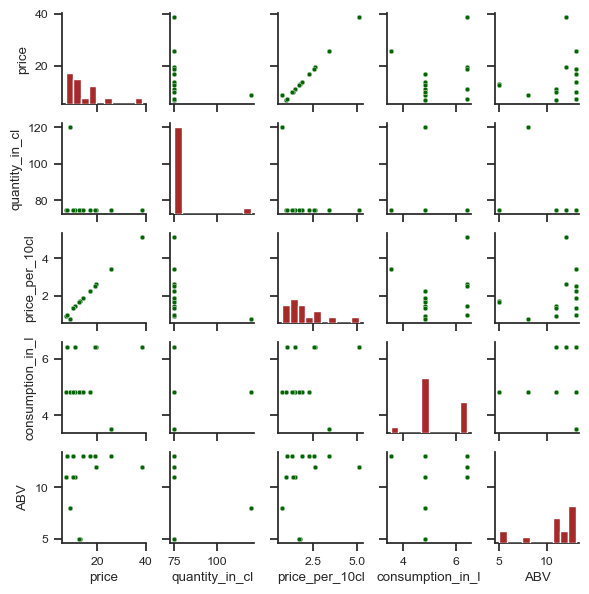

In [28]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_abv[['price', 
                     'quantity_in_cl', 
                     'price_per_10cl', 
                     'consumption_in_l',
                     'ABV']],
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

The matrix helps in identifying outliers and potential patterns for further analysis.

### Hexagonal binning plot  (matplotlib)

### Correlation heatmap (seaborn)

<Axes: >

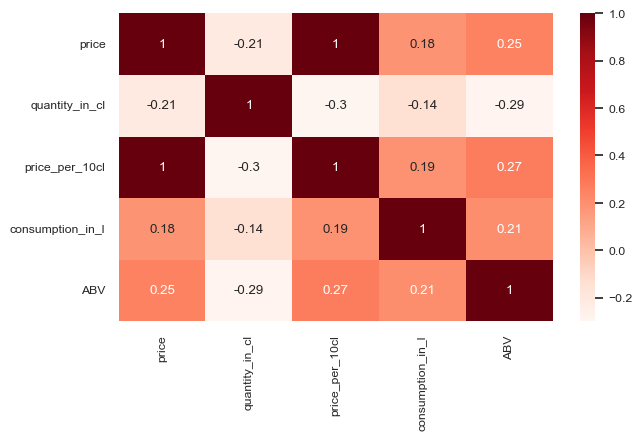

In [29]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_abv[['price', 
                     'quantity_in_cl', 
                     'price_per_10cl', 
                     'consumption_in_l',
                     'ABV']].corr().round(2)

# Plot heatmap with a pastel color palette
sns.heatmap(corr, 
            cmap="Reds", 
            annot=True)

Observations:
Price vs. ABV: Shows a weak positive correlation (0.25), suggesting that higher alcohol content slightly corresponds to higher prices.

Quantity in cl vs. Price per 10cl: A weak negative correlation (-0.3), indicating that larger quantities tend to have lower prices 

### Bubble plot (seaborn)

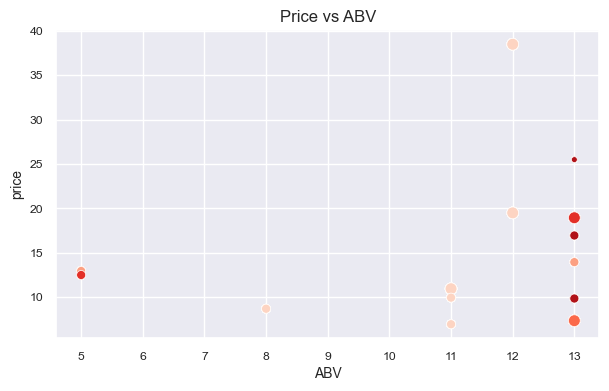

In [30]:
# Subset of df
df_sub = df_abv.loc[(df_abv['consumption_in_l'] >= 3) & (df_abv['consumption_in_l'] <= 10)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="ABV", 
                     y="price",
                     size="consumption_in_l", # determines bubble size
                     hue="wine_category",  # determines color
                     palette="Reds",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs ABV', fontsize = 12)
ax.set_xlabel('ABV', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

Bubble Size: Represents wine consumption in liters. Larger bubbles indicate higher consumption.
Color Coding: Differentiates wine categories, helping to identify patterns across categories.
Trends: There is no strong linear relationship between price and ABV, but wines with higher ABV tend to have a broader price range.

### Jupyter notebook --footer info-- 

In [31]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 24.1.0
Datetime: 2025-01-09 16:14:00
Python Version: 3.9.6
-----------------------------------
